# INTRODUCTION

Being probably the GDP the most important macroeconomic indicator, for every growing country is crucial to build a solid and sustainable economic system to increase this indicator. On this Project I am going to try to predict the GPD basen just on imports and exports. This with the intention to impulse policies to make stronger these two crucial indicators.

# IMPORTING LIBRARIES AND THE DATASET

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Global Economy Indicators.csv", sep = ",")
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [4]:
df.describe()

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,1.039100e+04,8.671000e+03,1.051200e+04,1.049100e+04,...,1.046000e+04,1.047000e+04,1.046900e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.046300e+04,1.046300e+04,1.051200e+04,1.051200e+04
mean,431.116629,1996.262747,3.573959e+02,3.419846e+02,2.851523e+07,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,4.671176e+10,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,251.169090,14.900361,2.291128e+03,1.941857e+03,1.141296e+08,17070.205895,4.034349e+10,8.932353e+09,4.985596e+10,1.748857e+11,...,6.038454e+11,1.804351e+11,1.723910e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.187359e+10,1.391727e+11,9.942144e+11,9.845997e+11
min,4.000000,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,-1.669759e+09,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,212.000000,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,730.000000,1.304522e+08,4.673545e+05,6.815523e+07,4.026725e+08,...,9.389897e+08,5.891469e+08,1.109497e+08,1.857038e+08,3.555891e+08,1.355670e+09,8.998828e+07,2.078732e+08,1.410772e+09,1.439217e+09
50%,430.000000,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,2316.500000,9.313674e+08,6.829635e+07,3.717701e+08,2.407906e+09,...,5.154424e+09,2.891919e+09,9.113543e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.441500e+08,1.056493e+09,7.887233e+09,8.070572e+09
75%,643.000000,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,8965.750000,4.023326e+09,6.910750e+08,2.815730e+09,1.542492e+10,...,3.008905e+10,1.602312e+10,7.405364e+09,1.251358e+10,1.442130e+10,4.819144e+10,3.975893e+09,6.707456e+09,5.005789e+10,5.172596e+10
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


# ETL

### Dropping all NAs

In [5]:
df.dropna(inplace = True)
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
52,8,Albania,1970,5.0,5.0,2324731,Lek,975,864793402.0,57793232.0,...,1.312561e+09,504595820.0,394647786.0,794665515.0,188952171.0,2.345798e+09,45739633.0,212298036.0,2.267360e+09,2.265577e+09
53,8,Albania,1971,5.0,5.0,2389812,Lek,976,889758995.0,59074883.0,...,1.350287e+09,519031885.0,406050295.0,817625694.0,194253684.0,2.413182e+09,47022973.0,218254570.0,2.332419e+09,2.330585e+09
54,8,Albania,1972,5.0,5.0,2455171,Lek,977,915350702.0,60818843.0,...,1.389164e+09,533991647.0,417663130.0,841009277.0,199867591.0,2.482484e+09,48381941.0,224562082.0,2.399403e+09,2.397526e+09
55,8,Albania,1973,5.0,5.0,2520436,Lek,979,941147592.0,63668482.0,...,1.428760e+09,549392880.0,429539992.0,864924791.0,205932186.0,2.553736e+09,49849969.0,231376034.0,2.468450e+09,2.466543e+09
56,8,Albania,1974,5.0,5.0,2585452,Lek,982,969063811.0,63077388.0,...,1.470097e+09,564865686.0,442272785.0,890563577.0,211067032.0,2.627172e+09,51092986.0,237145264.0,2.539022e+09,2.537016e+09


### Checking the total sum of NA

In [6]:
df.isnull().sum()

 CountryID                                                                                    0
 Country                                                                                      0
 Year                                                                                         0
 AMA exchange rate                                                                            0
 IMF based exchange rate                                                                      0
 Population                                                                                   0
 Currency                                                                                     0
 Per capita GNI                                                                               0
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           0
 Changes in inventories                                                                       0
 Construction (ISIC F)                  

# EDA

### Plotting how correlated is the GNI and the GDP

<Figure size 1800x360 with 0 Axes>

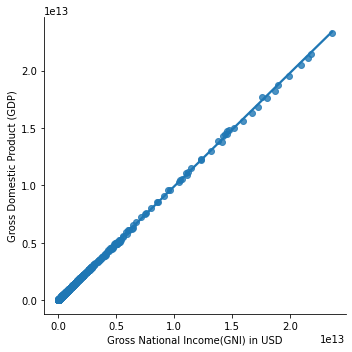

In [7]:
plt.figure(figsize=(25,5))
sns.lmplot(' Gross National Income(GNI) in USD ', ' Gross Domestic Product (GDP) ', data  = df)
plt.show()

### Plotting how correlated is the Imports and the GDP

<Figure size 1080x360 with 0 Axes>

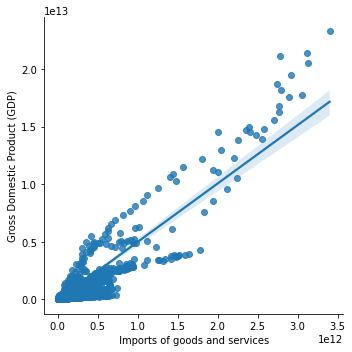

In [8]:
plt.figure(figsize=(15,5))
sns.lmplot(' Imports of goods and services ', ' Gross Domestic Product (GDP) ', data  = df)
plt.show()

### Plotting how correlated is the Mining, Manufacturing and Utilities with the GDP

<Figure size 1080x360 with 0 Axes>

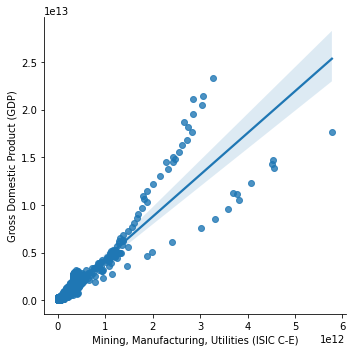

In [9]:
plt.figure(figsize=(15,5))
sns.lmplot(' Mining, Manufacturing, Utilities (ISIC C-E) ', ' Gross Domestic Product (GDP) ', data  = df)
plt.show()

### Barplot of the top 10 average GNI per country

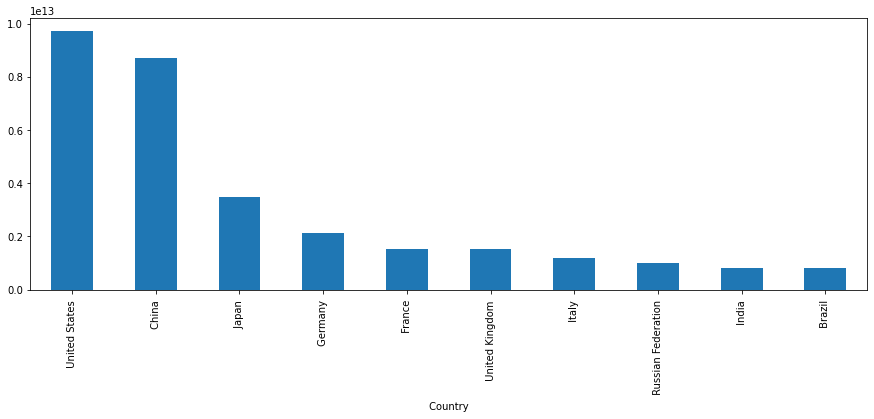

In [10]:
plt.figure(figsize=(15,5))
df.groupby(" Country ")[" Gross National Income(GNI) in USD "].mean().sort_values(ascending = False).head(10).plot(kind="bar")
plt.show()

### Barplot of the top 10 average GDP per country

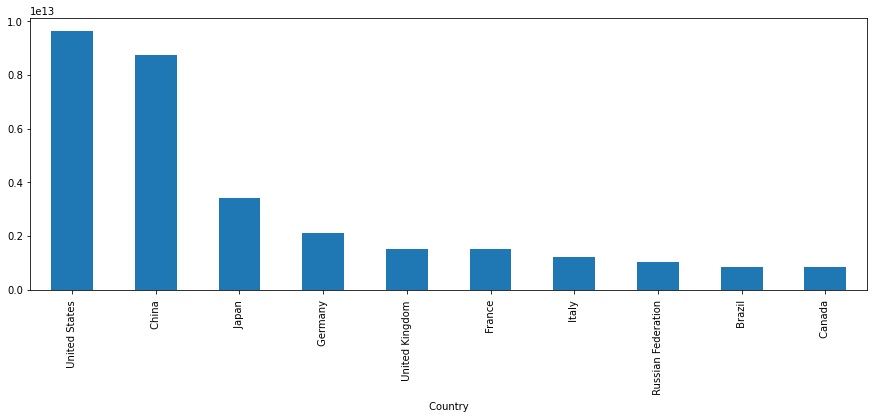

In [11]:
plt.figure(figsize=(15,5))
df.groupby(" Country ")[" Gross Domestic Product (GDP) "].mean().sort_values(ascending = False).head(10).plot(kind="bar")
plt.show()

### Barplot of the top 10 most populated countres

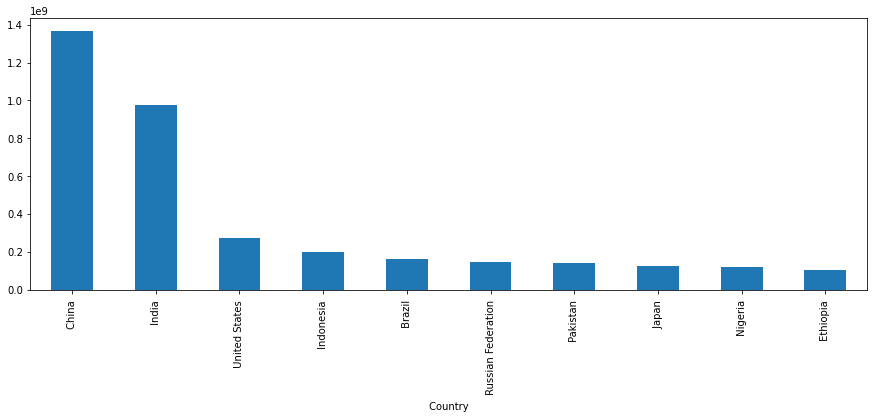

In [12]:
plt.figure(figsize=(15,5))
df.groupby(" Country ")[" Population "].mean().sort_values(ascending = False).head(10).plot(kind="bar")
plt.show()

### Lineplot of the number of population through the years

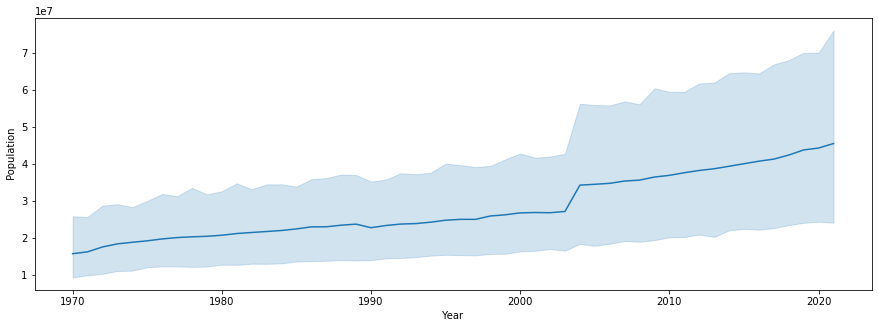

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df[" Year "], y = df[" Population "])
plt.show()

### Lineplot of the number of GNI through the years

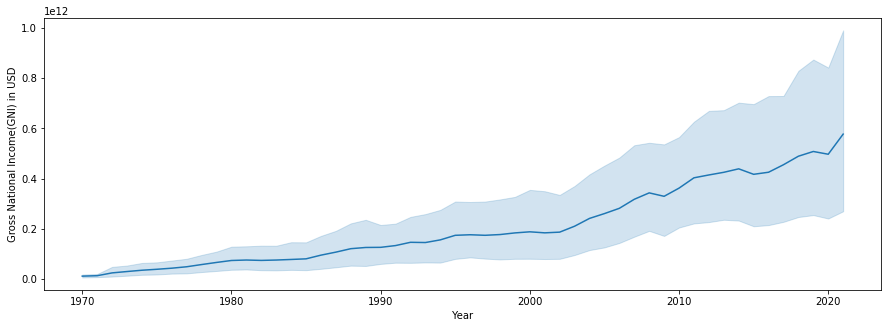

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df[" Year "], y = df[" Gross National Income(GNI) in USD "])
plt.show()

### Lineplot of the number of imports through the year

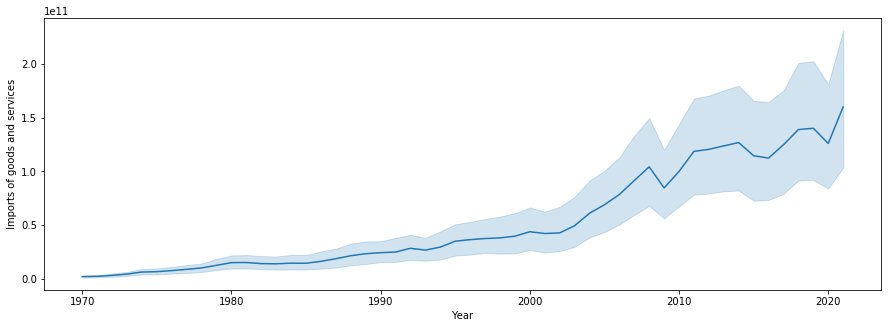

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df[" Year "], y = df[" Imports of goods and services "])
plt.show()

### List of the correlation of variables for GDP

In [16]:
highCorr = df.corr()[' Gross Domestic Product (GDP) '].sort_values()
highCorr

 IMF based exchange rate                                                                     -0.005896
 AMA exchange rate                                                                           -0.003469
 CountryID                                                                                    0.060049
 Year                                                                                         0.136954
 Per capita GNI                                                                               0.266828
 Population                                                                                   0.453532
 Changes in inventories                                                                       0.527122
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           0.613809
 Exports of goods and services                                                                0.866509
 Manufacturing (ISIC D)                                                  

### List of all columns on the dataset

In [17]:
highCorr.index

Index([' IMF based exchange rate ', ' AMA exchange rate ', ' CountryID ',
       ' Year ', ' Per capita GNI ', ' Population ',
       ' Changes in inventories ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Exports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Imports of goods and services ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Construction (ISIC F) ', ' Other Activities (ISIC J-P) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Total Value Added ', ' Gross National Income(GNI) in USD ',
       

# MACHINE LEARNING

### Creating the dependent and independent datasets

In [18]:
X = df[[' Imports of goods and services ',
       ' Exports of goods and services ']]

y = df[' Gross Domestic Product (GDP) ']

### Creating the training and testing datasets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.25, random_state=101)

### Training the model

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)

lr_pred = lm.predict(X_test)

### Scatter plot of the predicted values vs. real values

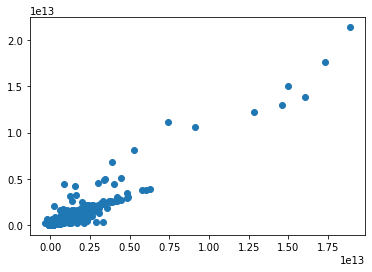

In [21]:
plt.scatter(lr_pred, y_test)

### Histogram of the residuals (errors)

<AxesSubplot:xlabel=' Gross Domestic Product (GDP) ', ylabel='Density'>

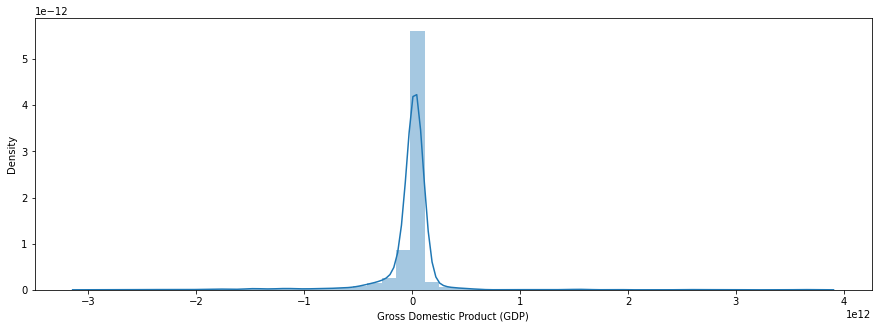

In [22]:
plt.figure(figsize=(15,5))
sns.distplot((y_test-lr_pred))

### Calculation the performance of the model

In [23]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, lr_pred))
print("MSE: ", metrics.mean_squared_error(y_test, lr_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, lr_pred)),2),"%")

MAE:  119872452418.31635
MSE:  1.1152463947832733e+23
RMSE:  333953049811.3879
Variance Score:  89.77 %


# SIMULATION

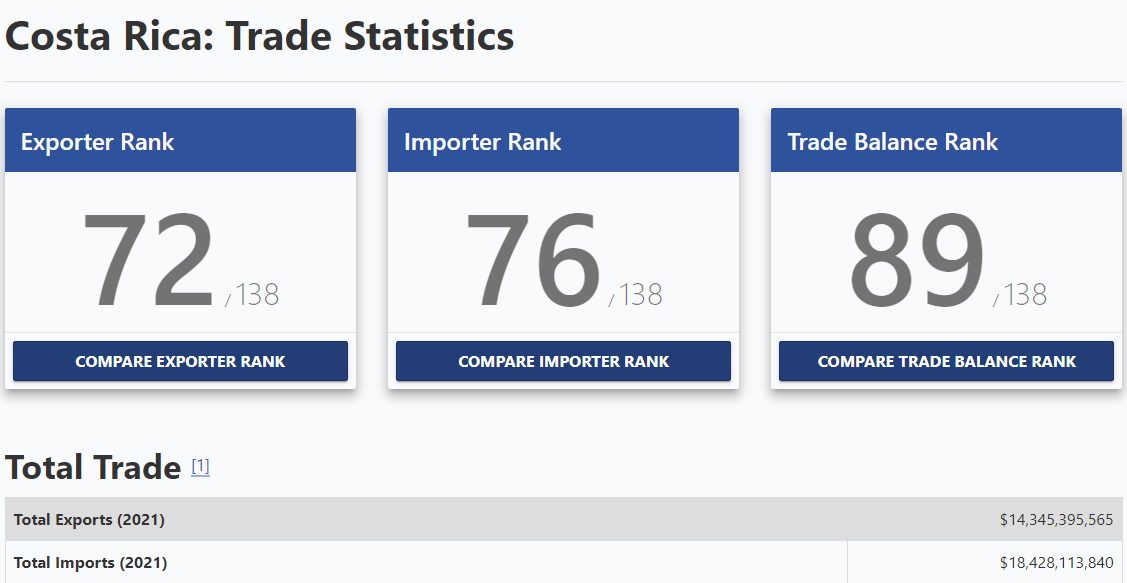

In [24]:
imp = int(18428113840)
exp = int(14345395565)
impextDic = {"Imports": imp, "Exports": exp}
simulationDF = pd.DataFrame(data = impextDic, index =[1,2])
simulationGDP = lm.predict(simulationDF)
print(f"For Imports of {imp} and Exports of {exp}, we could got a GDP of {simulationGDP[0]}")

For Imports of 18428113840 and Exports of 14345395565, we could got a GDP of 76255723619.3306
